# Machine learning methods for Fraudulent Transactions Prediction
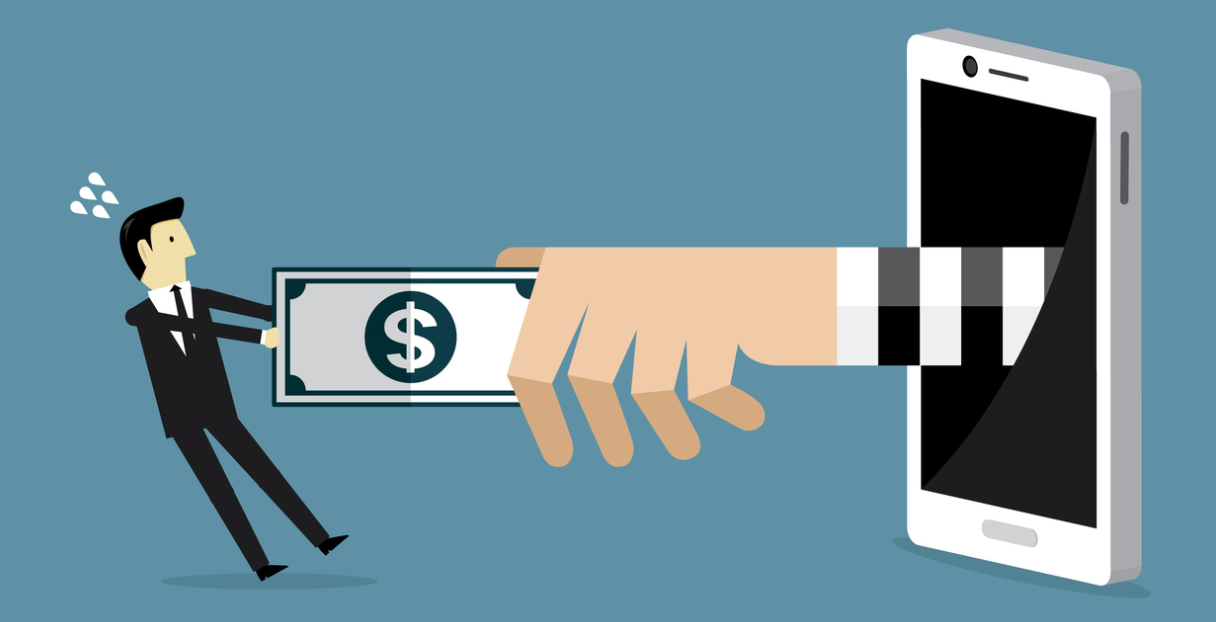


The finance industry has undergone a massive transformation over the years, with the integration of technology. The most evident transformation has been in the way we look at payment transactions now. The digital payments market has seen a phenomenal growth in the last few years.

In 2020, the total value of digital payment transactions is projected at USD 4,934,741 million, reports Statista. The same report states that the number of users in Mobile POS Payments is expected to reach 1800.4 million by the year 2024.

As digital payments have become commonplace, so have digital frauds. Fraud management has been painful for the banking and commerce industry. Fraudsters have become adept at finding loopholes. are phishing for naïve people and extracting money from them in creative ways.

As a result, companies have started to efficiently manage the vulnerabilities and close the loopholes within their payment systems through fraud detection via machine learning and predictive analytics. According to a study by VynZ Research, the fraud detection and prevention market is expected to reach USD 85.3 billion, growing at a CAGR of 17.8% during 2020-2025.

Machine learning techniques are obviously more reliable than human review and transaction rules. The machine learning solutions are efficient, scalable and process a large number of transactions in real time.

### Step 1: Downloading the dataset

In [1]:
import opendatasets as od
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
import jovian
import os
import plotly.express as px
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [2]:
od.download('https://www.kaggle.com/datasets/vardhansiramdasu/fraudulent-transactions-prediction')

Skipping, found downloaded files in ".\fraudulent-transactions-prediction" (use force=True to force download)


In [3]:
os.listdir('fraudulent-transactions-prediction')

['Fraud.csv']

#### About Dataset
step - maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).

type - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.

amount - amount of the transaction in local currency.

nameOrig - customer who started the transaction

oldbalanceOrg - initial balance before the transaction

newbalanceOrig - new balance after the transaction

nameDest - customer who is the recipient of the transaction

oldbalanceDest - initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants).

newbalanceDest - new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants).

isFraud - This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.

isFlaggedFraud - The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.

In [4]:
raw_df = pd.read_csv('fraudulent-transactions-prediction/Fraud.csv')

In [5]:
raw_df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


Dataset has over 64 lakhs of rows. It might be computationally expensive to train our models with such huge training datasets. Hence we will trim our dataset to 70k only.

In [6]:
main_df = raw_df.head(70000).drop('isFlaggedFraud', axis = 1).drop('nameOrig', axis = 1).drop('nameDest', axis = 1)

In [7]:
main_df

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,170136.00,160296.36,0.00,0.00,0
1,1,PAYMENT,1864.28,21249.00,19384.72,0.00,0.00,0
2,1,TRANSFER,181.00,181.00,0.00,0.00,0.00,1
3,1,CASH_OUT,181.00,181.00,0.00,21182.00,0.00,1
4,1,PAYMENT,11668.14,41554.00,29885.86,0.00,0.00,0
...,...,...,...,...,...,...,...,...
69995,9,CASH_IN,301068.85,26248.97,327317.82,59492.58,26961.72,0
69996,9,CASH_OUT,599605.06,327317.82,0.00,3358245.88,3962131.82,0
69997,9,PAYMENT,7581.87,19873.00,12291.13,0.00,0.00,0
69998,9,CASH_OUT,60689.19,84909.00,24219.81,258227.80,250830.57,0


### Step 2: Exploratory data analysis and visualization

Lets have a look at the amount of money which was being transferred when that transaction was fraud.

In [8]:
temp = main_df.iloc[:,-1:]

In [9]:
temp.value_counts()

isFraud
0          69893
1            107
dtype: int64

In [10]:
frauds = temp.value_counts()[1]

In [11]:
print(f'Out of the selected {len(main_df)} transactions, {frauds} are fraud')

Out of the selected 70000 transactions, 107 are fraud


In [12]:
fraud_df = main_df[main_df['isFraud']==1]

In [13]:
fraud_df

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
2,1,TRANSFER,181.00,181.00,0.00,0.00,0.00,1
3,1,CASH_OUT,181.00,181.00,0.00,21182.00,0.00,1
251,1,TRANSFER,2806.00,2806.00,0.00,0.00,0.00,1
252,1,CASH_OUT,2806.00,2806.00,0.00,26202.00,0.00,1
680,1,TRANSFER,20128.00,20128.00,0.00,0.00,0.00,1
681,1,CASH_OUT,20128.00,20128.00,0.00,6268.00,12145.85,1
724,1,CASH_OUT,416001.33,0.00,0.00,102.00,9291619.62,1
969,1,TRANSFER,1277212.77,1277212.77,0.00,0.00,0.00,1
970,1,CASH_OUT,1277212.77,1277212.77,0.00,0.00,2444985.19,1
1115,1,TRANSFER,35063.63,35063.63,0.00,0.00,0.00,1


<AxesSubplot:title={'center':'Number of fraud transactions at particular steps'}, xlabel='step', ylabel='count'>

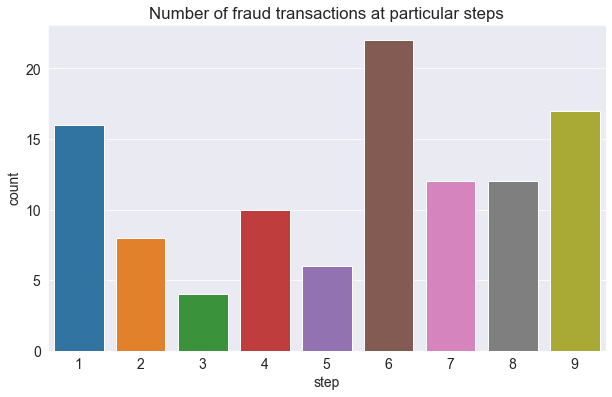

In [14]:
plt.title('Number of fraud transactions at particular steps')
sns.countplot(x = "step" , data = fraud_df )

Most fraud transactions have occured at the 6th step (hour)

In [15]:
main_df.isna().sum()

step              0
type              0
amount            0
oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

<AxesSubplot:xlabel='type', ylabel='count'>

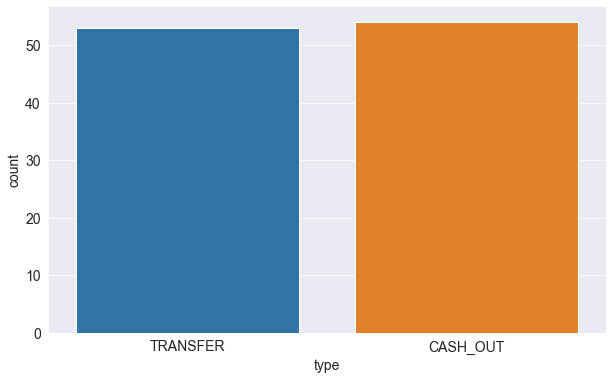

In [16]:
sns.countplot(x = 'type', data = fraud_df)

Fraudulent transactions occur in Cash out and Tranfer type of payments only.

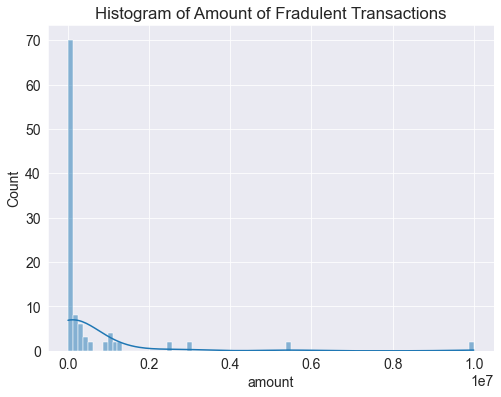

In [17]:
plt.figure(figsize=(8,6))
sns.histplot(data= fraud_df ,x='amount', kde=True)
plt.title('Histogram of Amount of Fradulent Transactions')
plt.show()

Distribution is positively skewed. Most of the transactions lie below amount of 200000

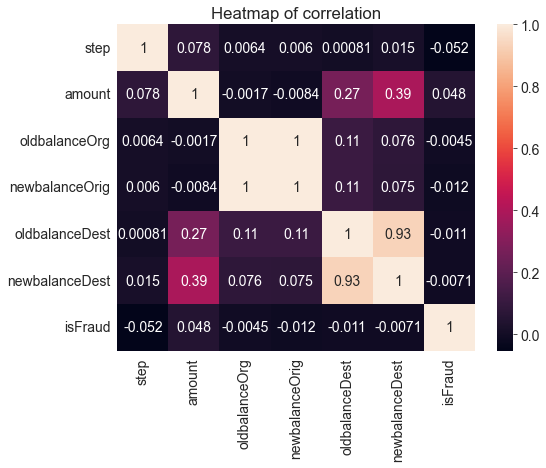

In [18]:
plt.figure(figsize=(8,6))
sns.heatmap(data = main_df.corr(),annot=True)
plt.title('Heatmap of correlation')
plt.show()

### Step 3: Data preparation and scaling

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

##### Python Pandas – get_dummies() method
pandas.get_dummies() is used for data manipulation. It converts categorical data into dummy or indicator variables.

In [20]:
dummy_type = pd.get_dummies(main_df['type'], prefix='type', drop_first=True)
dummy_type.head(10)

,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,0,0,1,0
1,0,0,1,0
2,0,0,0,1
3,1,0,0,0
4,0,0,1,0
5,0,0,1,0
6,0,0,1,0
7,0,0,1,0
8,0,0,1,0
9,0,1,0,0


In [21]:
main_df = pd.concat([main_df, dummy_type], axis=1)
main_df = main_df.drop('type', axis=1)

main_df.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0,0,1,0
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0,0,1,0
2,1,181.00,181.0,0.00,0.0,0.0,1,0,0,0,1
3,1,181.00,181.0,0.00,21182.0,0.0,1,1,0,0,0
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,0,0,1,0


In [22]:
main_df

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,170136.00,160296.36,0.00,0.00,0,0,0,1,0
1,1,1864.28,21249.00,19384.72,0.00,0.00,0,0,0,1,0
2,1,181.00,181.00,0.00,0.00,0.00,1,0,0,0,1
3,1,181.00,181.00,0.00,21182.00,0.00,1,1,0,0,0
4,1,11668.14,41554.00,29885.86,0.00,0.00,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
69995,9,301068.85,26248.97,327317.82,59492.58,26961.72,0,0,0,0,0
69996,9,599605.06,327317.82,0.00,3358245.88,3962131.82,0,1,0,0,0
69997,9,7581.87,19873.00,12291.13,0.00,0.00,0,0,0,1,0
69998,9,60689.19,84909.00,24219.81,258227.80,250830.57,0,1,0,0,0


In [23]:
# Splitting features and target 
X = main_df.drop(['isFraud'],axis=1)
y = main_df['isFraud']

In [24]:
col_to_scale = ['step','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']

In [25]:
# scaler
scaler = MinMaxScaler().fit(main_df[col_to_scale])

In [26]:
main_df[col_to_scale] = scaler.transform(main_df[col_to_scale])

In [27]:
main_df

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,0.0,0.000984,0.005034,0.004713,0.000000,0.000000,0,0,0,1,0
1,0.0,0.000186,0.000629,0.000570,0.000000,0.000000,0,0,0,1,0
2,0.0,0.000018,0.000005,0.000000,0.000000,0.000000,1,0,0,0,1
3,0.0,0.000018,0.000005,0.000000,0.000677,0.000000,1,1,0,0,0
4,0.0,0.001167,0.001230,0.000879,0.000000,0.000000,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
69995,1.0,0.030107,0.000777,0.009625,0.001900,0.000843,0,0,0,0,0
69996,1.0,0.059960,0.009685,0.000000,0.107268,0.123906,0,1,0,0,0
69997,1.0,0.000758,0.000588,0.000361,0.000000,0.000000,0,0,0,1,0
69998,1.0,0.006069,0.002512,0.000712,0.008248,0.007844,0,1,0,0,0


In [28]:
# Splitting train and test data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,stratify=y,random_state=1)

Data is now more or less ready to be trained

### Step 4 : Modeling

##### Model 1: Decision Trees

Decision tree is the most powerful and popular tool for classification and prediction. A Decision tree is a flowchart like tree structure, where each internal node denotes a test on an attribute, each branch represents an outcome of the test, and each leaf node (terminal node) holds a class label.
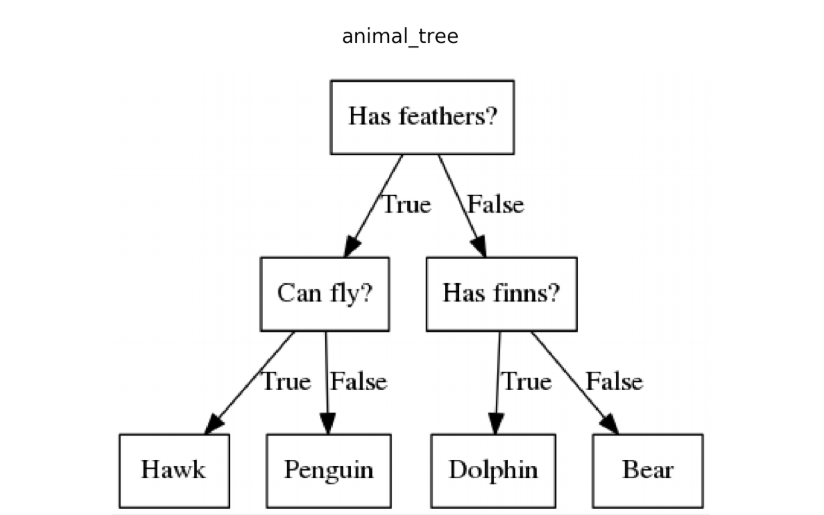

In [29]:
from sklearn.tree import DecisionTreeClassifier

In [30]:
model = DecisionTreeClassifier(random_state=42)

In [31]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [32]:
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [33]:
train_preds = model.predict(X_train)

In [34]:
train_preds

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [35]:
pd.value_counts(train_preds)

0    48925
1       75
dtype: int64

In [36]:
accuracy_score(y_train, train_preds)

1.0

The training set accuracy is 100%! But we can't rely solely on the training set accuracy, we must evaluate the model on the test set too.

In [37]:
model.score(X_test, y_test)

0.9985714285714286

Seems like a very descent score.

____________________________________________________________________________________

##### Model 2 : Random forest

Random forest is a Supervised Machine Learning Algorithm that is used widely in Classification and Regression problems. It builds decision trees on different samples and takes their majority vote for classification and average in case of regression.
A random forest works by averaging/combining the results of several decision trees:

<img src="https://1.bp.blogspot.com/-Ax59WK4DE8w/YK6o9bt_9jI/AAAAAAAAEQA/9KbBf9cdL6kOFkJnU39aUn4m8ydThPenwCLcBGAsYHQ/s0/Random%2BForest%2B03.gif" width="640">


We'll use the `RandomForestClassifier` class from `sklearn.ensemble`.

In [38]:
from sklearn.ensemble import RandomForestClassifier

In [39]:
model = RandomForestClassifier(n_jobs=-1, random_state=42)

In [40]:
model.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [41]:
model.score(X_train, y_train)

1.0

In [42]:
model.score(X_test, y_test)

0.9990952380952381

##### Hyperparameter tuning

Hyperparameter tuning is choosing a set of optimal hyperparameters for a learning algorithm. A hyperparameter is a model argument whose value is set before the learning process begins. The key to machine learning algorithms is hyperparameter tuning.
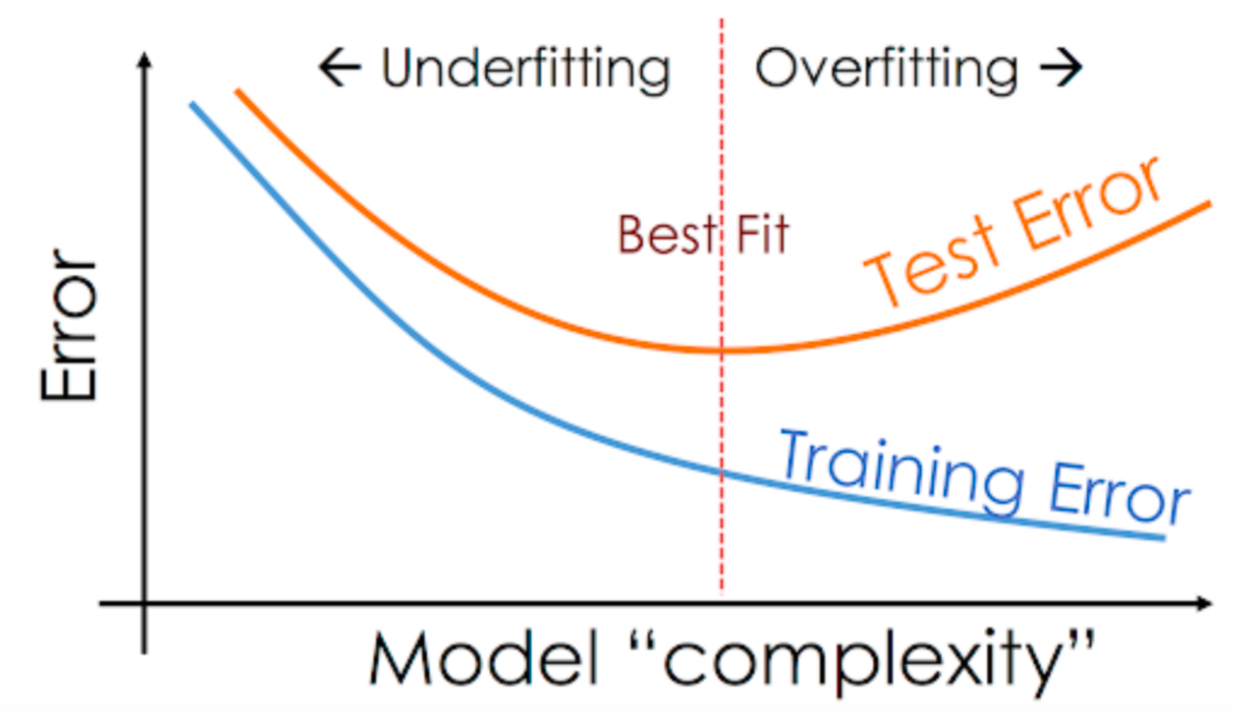

In [43]:
base_model = RandomForestClassifier(random_state=42, n_jobs=-1).fit(X_train, y_train)

In [44]:
base_train_acc = base_model.score(X_train, y_train)
base_val_acc = base_model.score(X_test, y_test)

In [45]:
base_accs = base_train_acc, base_val_acc
base_accs

(1.0, 0.9990952380952381)

In [46]:
def test_params(**params):
    model = RandomForestClassifier(random_state=42, n_jobs=-1, **params).fit(X_train, y_train)
    return model.score(X_train, y_train), model.score(X_test, y_test)

In [47]:
test_params(max_depth=5)

(0.9986734693877551, 0.9986190476190476)

In [48]:
test_params(max_depth=26)

(1.0, 0.9990952380952381)

In [49]:
test_params(max_leaf_nodes=2**5)

(0.9993469387755102, 0.999)

In [50]:
test_params(max_leaf_nodes=2**20)

(0.9999795918367347, 0.9990952380952381)

In [51]:
base_accs # no max depth or max leaf nodes

(1.0, 0.9990952380952381)

In [52]:
test_params(max_features='log2')

(1.0, 0.9990952380952381)

In [53]:
test_params(max_features=3)

(1.0, 0.9990952380952381)

In [54]:
test_params(max_features=6)

(0.9999795918367347, 0.9989047619047619)

In [55]:
test_params(min_samples_split=3, min_samples_leaf=2)

(0.9995918367346939, 0.999)

In [56]:
test_params(min_samples_split=100, min_samples_leaf=60)

(0.9984693877551021, 0.9984761904761905)

In [57]:
test_params(min_impurity_decrease=1e-7)

(0.9997959183673469, 0.9991428571428571)

In [58]:
base_accs

(1.0, 0.9990952380952381)

min_impurity_decrease=1e-7 increases the model score by 0.01%

Feature importance looks as follows

In [59]:
importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

In [60]:
importance_df

,feature,importance
1,amount,0.257370
2,oldbalanceOrg,0.213580
5,newbalanceDest,0.198267
4,oldbalanceDest,0.178769
0,step,0.074681
3,newbalanceOrig,0.031035
9,type_TRANSFER,0.021117
6,type_CASH_OUT,0.015357
8,type_PAYMENT,0.008418
7,type_DEBIT,0.001406


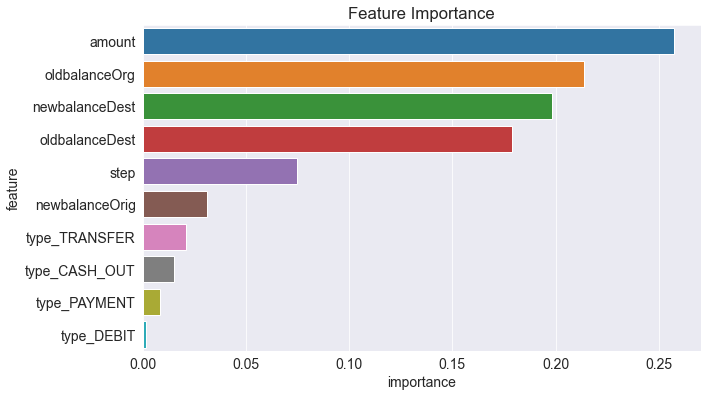

In [61]:
import seaborn as sns
plt.figure(figsize=(10,6))
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

##### Model 3 : Gradient boosting by XGBoost

The term "gradient" refers to the fact that each decision tree is trained with the purpose of reducing the loss from the previous iteration (similar to gradient descent). The term "boosting" refers the general technique of training new models to improve the results of an existing model.
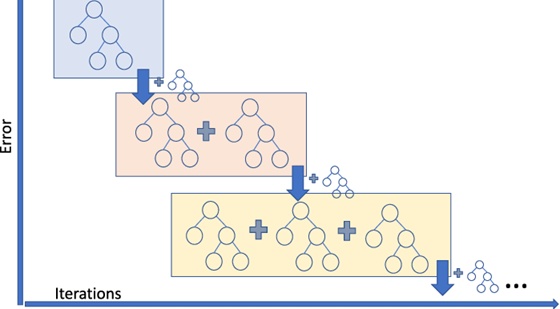

In [62]:
!pip install jovian opendatasets xgboost graphviz lightgbm scikit-learn xgboost lightgbm --upgrade --quiet

In [63]:
from xgboost import XGBRegressor

In [64]:
model = XGBRegressor(random_state=42, n_jobs=-1, n_estimators=20, max_depth=4)

In [65]:
model.fit(X,y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=4, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=20, n_jobs=-1,
             num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [66]:
preds = model.predict(X)

In [67]:
from sklearn.metrics import mean_squared_error

def rmse(a, b):
    return mean_squared_error(a, b, squared=False)

In [68]:
rmse(preds,y)

0.025005647632456857

##### Hyperparameter tuning

Hyperparameter tuning is choosing a set of optimal hyperparameters for a learning algorithm. A hyperparameter is a model argument whose value is set before the learning process begins. The key to machine learning algorithms is hyperparameter tuning.
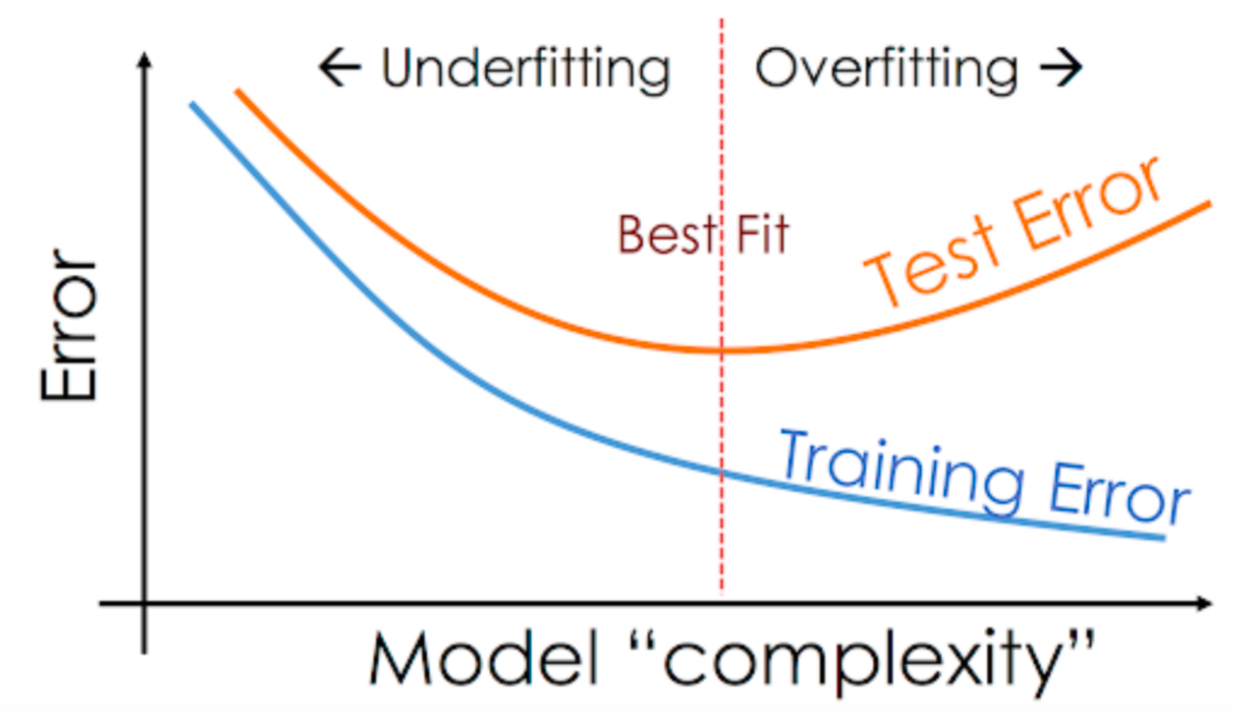

In [69]:
def test_params(**params):
    model = XGBRegressor(n_jobs=-1, random_state=42, **params)
    model.fit(X_train, y_train)
    train_rmse = rmse(model.predict(X_train), y_train)
    val_rmse = rmse(model.predict(X_test), y_test)
    print('Train RMSE: {}, Validation RMSE: {}'.format(train_rmse, val_rmse))

In [70]:
test_params(n_estimators=10)

Train RMSE: 0.0263552333317969, Validation RMSE: 0.03352773981849142


In [71]:
test_params(n_estimators=30)

Train RMSE: 0.01286179550173053, Validation RMSE: 0.02824649441767531


In [72]:
test_params(n_estimators=240)

Train RMSE: 0.0013254733510431513, Validation RMSE: 0.02792275329575382


In [73]:
test_params(max_depth=2)

Train RMSE: 0.03250334823180944, Validation RMSE: 0.03571621015193538


In [74]:
test_params(max_depth=10)

Train RMSE: 0.0009084252538779573, Validation RMSE: 0.030178665349812398


In [75]:
test_params(max_depth=60)

Train RMSE: 0.0003017361745502947, Validation RMSE: 0.029662388596291587


In [76]:
test_params(n_estimators=50, learning_rate=0.01)

Train RMSE: 0.30340800614679525, Validation RMSE: 0.3036049477060788


In [77]:
test_params(n_estimators=50, learning_rate=1.333)

Train RMSE: 0.0011483309010404447, Validation RMSE: 0.03352460805761812


Unfortunately max_depths, n_estimators, learning_rate are not helping in tuning the hyperparameters of XGBoost model

In [78]:
test_params(booster='gblinear')

Train RMSE: 0.03960453921827458, Validation RMSE: 0.03951320375430014


Clearly, a linear model is not well suited for this dataset.

##### Model 4: SVM

SVM is a supervised machine learning algorithm which can be used for classification or regression problems. It uses a technique called the kernel trick to transform your data and then based on these transformations it finds an optimal boundary between the possible outputs.
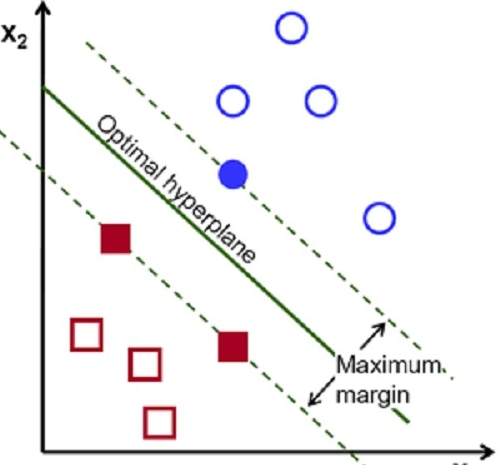

In [79]:
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(X_train, y_train)

SVC()

In [80]:
#Import svm model
from sklearn import svm
#Create a svm Classifier
clf = svm.SVC(kernel='poly') # Polynomial kernel

In [81]:
#Train the model using the training sets
clf.fit(X_train, y_train)

SVC(kernel='poly')

In [82]:
#Predict the response for test dataset
y_pred = clf.predict(X_test)

<AxesSubplot:>

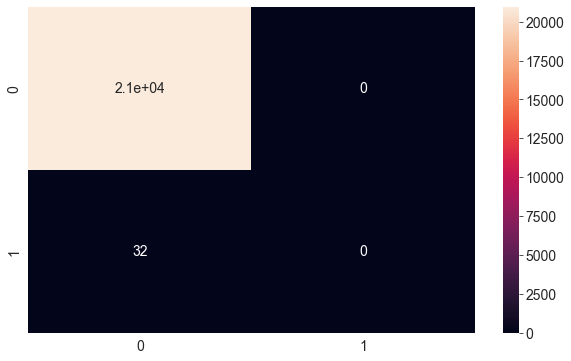

In [83]:
from sklearn.metrics import classification_report, confusion_matrix
y_predict = svc_model.predict(X_test)
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot=True)

In [84]:
clf.score(X_train, y_train)

0.9985102040816326

99.8% accuracy achieved

References:

https://jovian.ai/learn/machine-learning-with-python-zero-to-gbms/lesson/gradient-boosting-with-xgboost

https://towardsdatascience.com/breast-cancer-classification-using-support-vector-machine-svm-a510907d4878

https://www.coursera.org/learn/machine-learning

https://www.kaggle.com/code/naveenkonam1985/fradulent-transactions-prediction

